In [1]:
import pandas as pd

In [2]:
import numpy as np

In [19]:
from warnings import filterwarnings
filterwarnings("ignore")
import seaborn as sns

In [20]:
df=pd.read_csv('Wholesale customers data.csv')

In [21]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


DATA INTERPRETATION AND ANALYSIS

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727e+00,0.468052,1.000000,1.000000,1.000000,2.000000,2.000000
Region,440.0,2.543182e+00,0.774272,1.000000,2.000000,3.000000,3.000000,3.000000
Fresh,440.0,-2.018587e-17,1.001138,-0.949683,-0.702334,-0.276760,0.390523,7.927738
Milk,440.0,0.000000e+00,1.001138,-0.778795,-0.578306,-0.294258,0.189092,9.183650
Grocery,440.0,-2.422305e-17,1.001138,-0.837334,-0.610836,-0.336668,0.284911,8.936528
Frozen,440.0,0.000000e+00,1.001138,-0.628343,-0.480431,-0.318804,0.099464,11.919002
Detergents_Paper,440.0,1.614870e-17,1.001138,-0.604416,-0.551135,-0.433600,0.218482,7.967672
Delicassen,440.0,0.000000e+00,1.001138,-0.540264,-0.396401,-0.198577,0.104860,16.478447


In [36]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

No null values present in the dataset

In [38]:
# Standardize the data (excluding 'Channel' and 'Region')
from sklearn.preprocessing import StandardScaler

features = df.columns.difference(['Channel', 'Region'])
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,2,3,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,2,3,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,1,3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,2,3,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


## VISUALIZATION

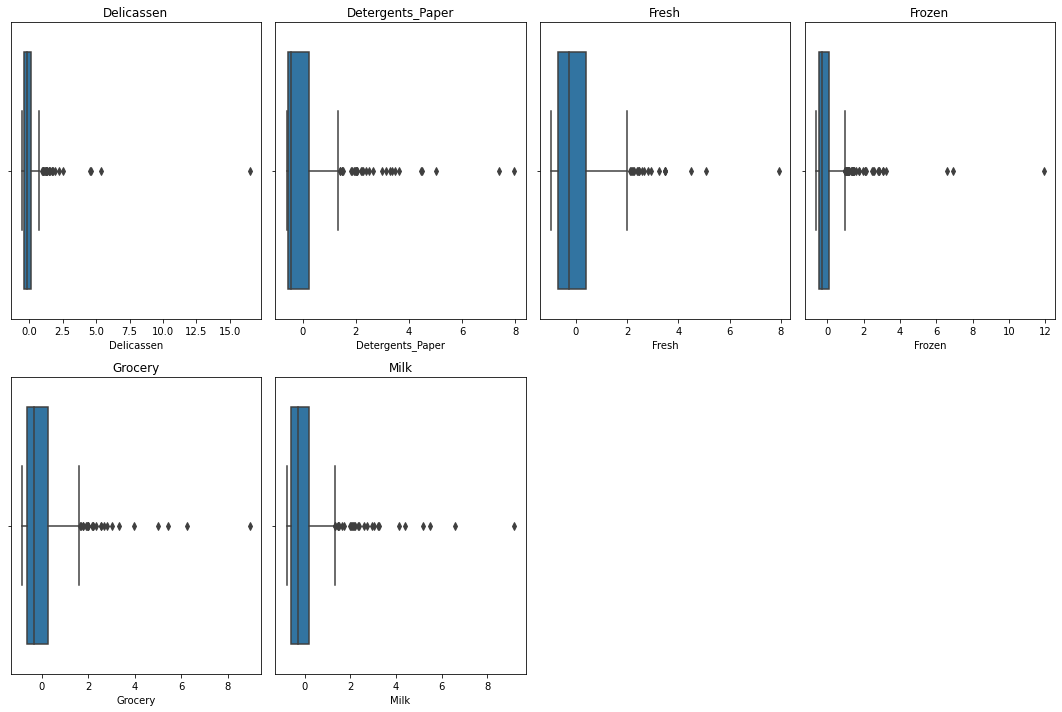

In [39]:
# Box plots to identify outliers
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.boxplot(df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()


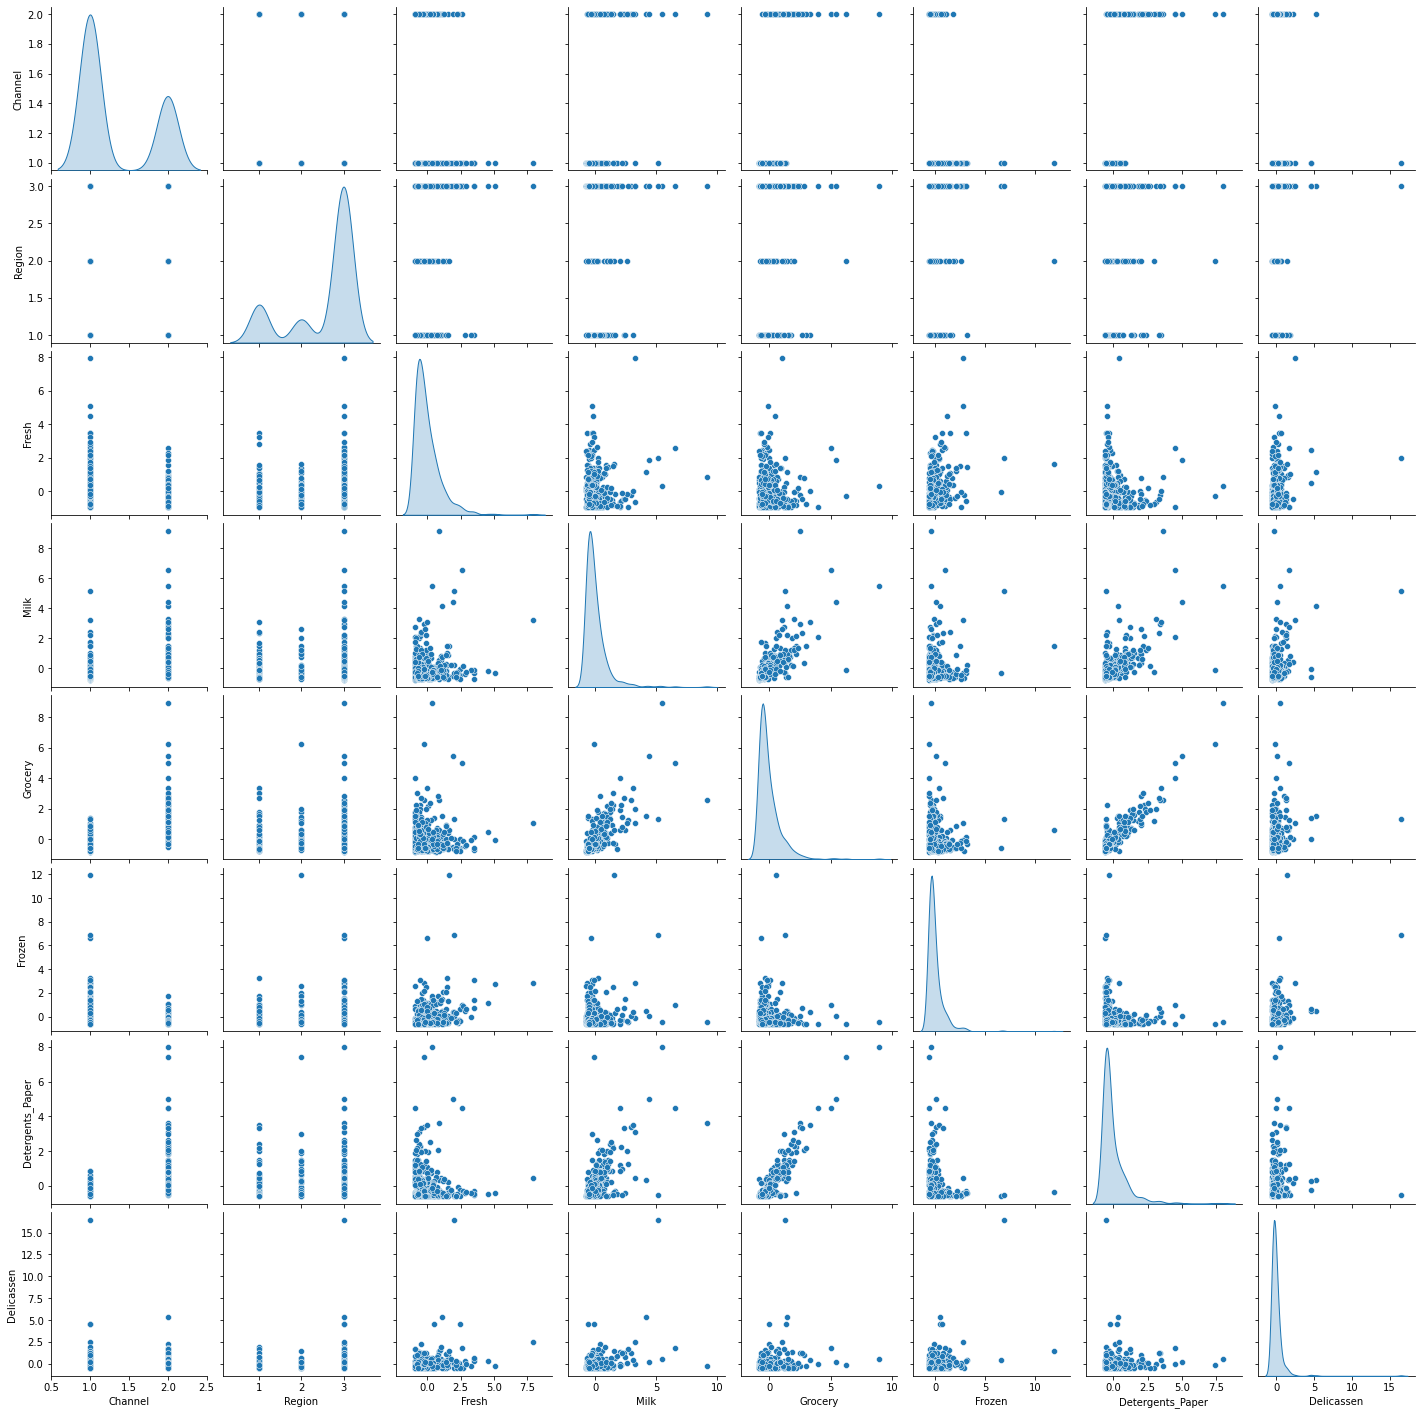

In [33]:

sns.pairplot(df, diag_kind='kde')
plt.show()


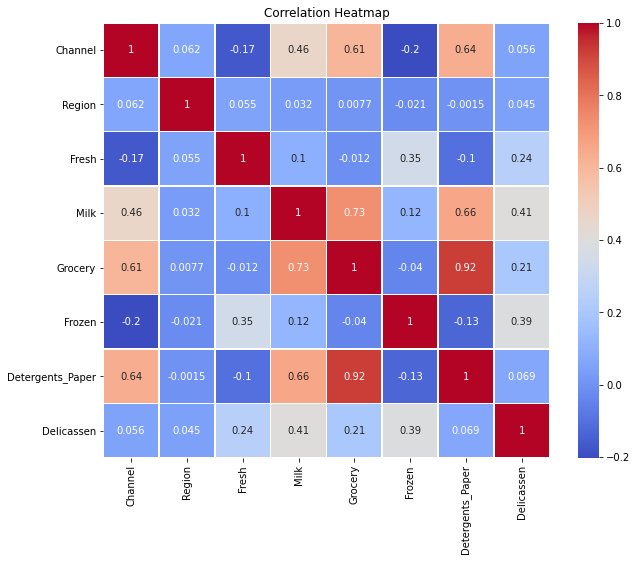

In [32]:
# Heatmap to visualize correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Clustering methods in unsupervised models 

KMEANS CLUSTERING

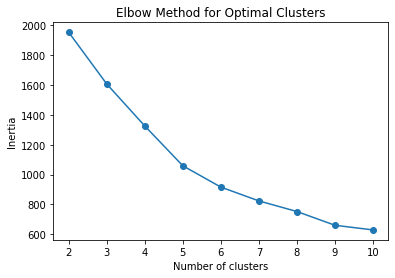

In [40]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume X contains the relevant columns for clustering
X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]


scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    scores.append(kmeans.inertia_)  

# Plot the elbow method to find the optimal number of clusters
plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


In [43]:
optimal_k = 5
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_optimal.fit_predict(X)
df['Cluster'] = clusters

# Now 'data' DataFrame contains a new column 'Cluster' indicating the cluster assignment for each data point
print(df.head())


   Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0        2       3  0.052933  0.523568 -0.041115 -0.589367         -0.043569   
1        2       3 -0.391302  0.544458  0.170318 -0.270136          0.086407   
2        2       3 -0.447029  0.408538 -0.028157 -0.137536          0.133232   
3        1       3  0.100111 -0.624020 -0.392977  0.687144         -0.498588   
4        2       3  0.840239 -0.052396 -0.079356  0.173859         -0.231918   

   Delicassen  Cluster  
0   -0.066339        3  
1    0.089151        1  
2    2.243293        1  
3    0.093411        3  
4    1.299347        0  


PLOTTING K MEANS CLUSTERS

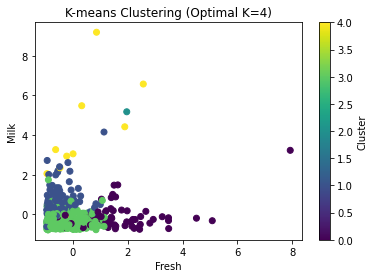

In [44]:
plt.scatter(df['Fresh'], df['Milk'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('K-means Clustering (Optimal K=4)')
plt.colorbar(label='Cluster')
plt.show()


DBSCAN

In [45]:
from sklearn.cluster import DBSCAN

# Use DBSCAN with default parameters for now
dbscan = DBSCAN()
clusters_dbscan = dbscan.fit_predict(X)
df['Cluster_DBSCAN'] = clusters_dbscan

# Check the cluster assignments
print(df.head())


   Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0        2       3  0.052933  0.523568 -0.041115 -0.589367         -0.043569   
1        2       3 -0.391302  0.544458  0.170318 -0.270136          0.086407   
2        2       3 -0.447029  0.408538 -0.028157 -0.137536          0.133232   
3        1       3  0.100111 -0.624020 -0.392977  0.687144         -0.498588   
4        2       3  0.840239 -0.052396 -0.079356  0.173859         -0.231918   

   Delicassen  Cluster  Cluster_DBSCAN  
0   -0.066339        3               0  
1    0.089151        1               0  
2    2.243293        1              -1  
3    0.093411        3               0  
4    1.299347        0              -1  


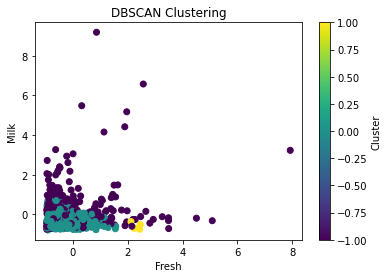

In [47]:
plt.scatter(df['Fresh'], df['Milk'], c=df['Cluster_DBSCAN'], cmap='viridis')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

HEIRACHICAL CLUSTERING

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

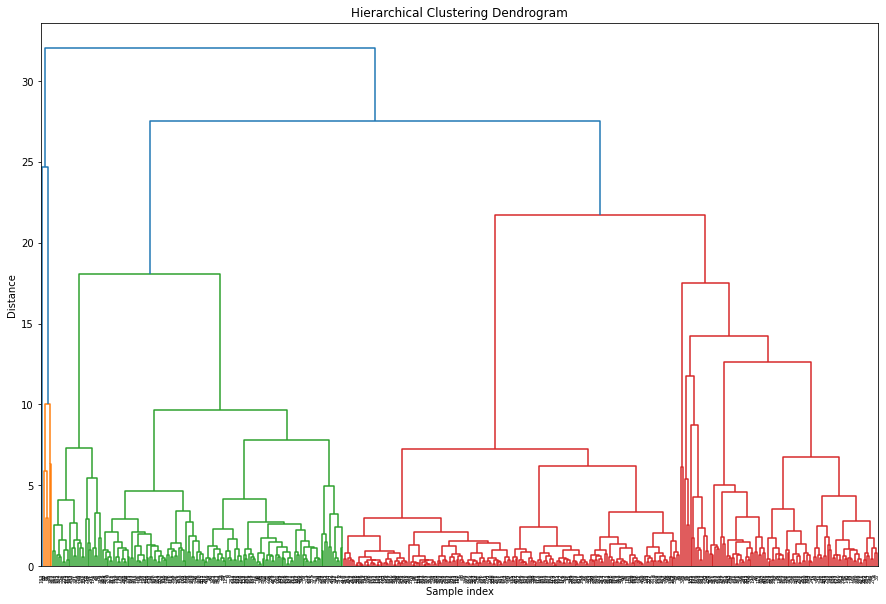

In [53]:
linkage_data = linkage(df[features], method='ward', metric='euclidean')

plt.figure(figsize=(15, 10))
dendrogram(linkage_data)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [58]:
num_clusters = 4
clusters = fcluster(Z, num_clusters, criterion='maxclust')


df['Cluster'] = clusters

In [ ]:
The number of clusters is 4 by clac

PCA for Dimensionality reduction

In [55]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X)


X_pca


array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.